<a href="https://colab.research.google.com/github/OtolaHan/Otola_Han_KAAN/blob/main/Lab_4_data_mining_Feature_Engineering(9_16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import nltk



def format_rows(docs):
    """ format the text field and strip special characters """
    D = []
    for d in docs.data:
        temp_d = " ".join(d.split("\n")).strip('\n\t')
        D.append([temp_d])
    return D

def format_labels(target, docs):
    """ format the labels """
    return docs.target_names[target]

def check_missing_values(row):
    """ functions that check and verifies if there are missing values in dataframe """
    counter = 0
    for element in row:
        if element == True:
            counter+=1
    return ("The amoung of missing records is: ", counter)

def tokenize_text(text, remove_stopwords=False):
    """
    Tokenize text using the nltk library
    """
    tokens = []
    for d in nltk.sent_tokenize(text, language='english'):
        for word in nltk.word_tokenize(d, language='english'):
            # filters here
            tokens.append(word)
    return tokens

In [2]:
# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [3]:
# получить документы, содержащие предоставленные категории
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [4]:
import pandas as pd

# создать фрейм данных из списка
X = pd.DataFrame.from_records(format_rows(twenty_train), columns= ['text'])

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

In [6]:
# добавить категорию во фрейм данных
X['category'] = twenty_train.target

In [7]:
# добавить также метку категории
X['category_name'] = X.category.apply(lambda t: format_labels(t, twenty_train))

### 5.2 Создание признаков
Другой операцией из списка выше, которую мы собираемся отработать, является так называемое создание признаков. Как следует из названия, при создании признаков мы рассматриваем создание новых интересных и полезных признаков из исходного набора данных; признак, который отражает наиболее важную информацию из необработанной информации, к которой у нас уже есть доступ. В нашей таблице `X` мы хотели бы создать некоторые признаки из поля `text`, но мы все еще не уверены, какие признаки мы хотим создать. Мы можем подумать об интересной проблеме, которую мы хотим решить, или о чем-то, что мы хотим проанализировать из данных, или о некоторых вопросах, на которые мы хотим ответить. Это один из процессов разработки признаков - этот процесс обычно называется `конструированием признаков` в сообществе специалистов по данным.

Мы знаем, что такое создание признаков, поэтому давайте реально вовлечемся в наш набор данных и сделаем его более интересным, добавив некоторые специальные признаки или атрибуты, если хотите. Во-первых, мы собираемся получить **униграммы** для каждого текста. (Униграмма - это всего лишь причудливое слово, которое мы используем в Text Mining, которое означает «токены» или «отдельные слова».) Да, мы хотим извлечь все слова, найденные в каждом тексте, и добавить их в качестве нового признака во фрейм данных pandas. Причина извлечения униграмм пока не совсем ясна, но мы можем начать думать о получении некоторой статистики о статьях, которые у нас есть: что-то вроде **распределения слов** или **частоты слов**.

Прежде чем переходить к дальнейшему кодированию, мы также представим полезную библиотеку интеллектуального анализа текста под названием [NLTK](http://www.nltk.org/). Библиотека NLTK - это инструмент обработки естественного языка, используемый для задач интеллектуального анализа текста, поэтому с этого момента мы вполне можем начать знакомиться с ним (это может пригодиться для финального проекта!). В частности, мы собираемся использовать библиотеку NLTK для проведения токенизации, потому что мы заинтересованы в разделении предложения на отдельные компоненты, которые мы называем словами, смайликами, электронными письмами и т. д. Итак, давайте сделаем это! Мы можем вызвать библиотеку `nltk` следующим образом:

```python
import nltk
```

In [8]:
import nltk

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
# для обработки требуется минута или две
X['unigrams'] = X['text'].apply(lambda x: tokenize_text(x))

In [11]:
X[0:4]["unigrams"]

,unigrams
0,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


Если вы внимательнее посмотрите на таблицу `X` сейчас, вы увидите новые столбцы `unigrams`, которые мы добавили. Вы заметите, что он содержит массив токенов, которые были извлечены из исходного поля `text`. На первый взгляд вы заметите, что токенизатор работает не очень хорошо, давайте внимательнее посмотрим на одну запись и посмотрим, каким был точный результат токенизации с использованием библиотеки `nltk`.

In [12]:
X[0:4]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."


In [13]:
list(X[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

Библиотека `nltk` довольно неплохо справляется с токенизацией нашего текста. Существует много других токенизаторов в Интернете, таких как [spaCy](https://spacy.io/) и встроенные библиотеки, предоставляемые [scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html). Мы используем библиотеку NLTK, потому что она имеет открытый исходный код и потому что она хорошо сегментирует данные на основе текста.

---

### 5.3 Выбор подмножества признаков
Хорошо, так что мы добиваемся некоторых успехов здесь. Теперь давайте сделаем вещи немного более интересными. Мы собираемся сделать что-то отличное от того, что мы делали до сих пор. Мы собираемся использовать немного всего, что мы узнали до сих пор. Говоря кратко, мы собираемся отойти от нашего основного набора данных (одна из форм выбора подмножества признаков), и мы собираемся сгенерировать матрицу документ-термин из исходного набора данных. Другими словами, мы собираемся создать что-то вроде этого.

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vS01RrtPHS3r1Lf8UjX4POgDol-lVF4JAbjXM3SAOU-dOe-MqUdaEMWwJEPk9TtiUvcoSqTeE--lNep/pub?w=748&h=366)

Первоначально он не будет иметь ту же форму, что и таблица выше, но мы перейдем к этому позже. А пока давайте используем встроенные функциональные возможности scikit learn для создания этого документа. Вы сами увидите, как легко сгенерировать эту таблицу без особого кодирования.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

In [15]:
X_counts

<2257x35788 sparse matrix of type '<class 'numpy.int64'>'
	with 365886 stored elements in Compressed Sparse Row format>

То, что мы сделали с этими двумя строками кода, это то, что мы преобразовали статьи в **матрицу слово-документ**. Эти строки кода токенизируют каждую статью с помощью встроенного токенизатора по умолчанию (часто называемого `анализатором`), а затем создает вектор частоты слов для каждого документа. Мы можем создавать свои собственные анализаторы или даже использовать анализатор nltk, который мы создали ранее. Чтобы все было аккуратно и минимально, мы собираемся использовать анализатор по умолчанию, предоставляемый `CountVectorizer`. Давайте внимательно посмотрим на этот анализатор.

In [16]:
analyze = count_vect.build_analyzer()
analyze("Hello World!")
#" ".join(list(X[4:5].text))

['hello', 'world']

### **>>> Упражнение 9:**
Давайте проанализируем первую запись нашего фрейма данных X с помощью нового анализатора, который мы только что создали. Вперед, попробуйте!

In [35]:
# Ответьте здесь
# Получаем текст первой записи из DataFrame X
first_record_text = X['text'][0]

# Используем анализатор для обработки текста первой записи
analyzed_first_record = analyze(first_record_text)

# Выводим результат анализа
print(analyzed_first_record)


['from', 'sd345', 'city', 'ac', 'uk', 'michael', 'collier', 'subject', 'converting', 'images', 'to', 'hp', 'laserjet', 'iii', 'nntp', 'posting', 'host', 'hampton', 'organization', 'the', 'city', 'university', 'lines', '14', 'does', 'anyone', 'know', 'of', 'good', 'way', 'standard', 'pc', 'application', 'pd', 'utility', 'to', 'convert', 'tif', 'img', 'tga', 'files', 'into', 'laserjet', 'iii', 'format', 'we', 'would', 'also', 'like', 'to', 'do', 'the', 'same', 'converting', 'to', 'hpgl', 'hp', 'plotter', 'files', 'please', 'email', 'any', 'response', 'is', 'this', 'the', 'correct', 'group', 'thanks', 'in', 'advance', 'michael', 'michael', 'collier', 'programmer', 'the', 'computer', 'unit', 'email', 'collier', 'uk', 'ac', 'city', 'the', 'city', 'university', 'tel', '071', '477', '8000', 'x3769', 'london', 'fax', '071', '477', '8565', 'ec1v', '0hb']


---

Теперь давайте посмотрим на матрицу слово-документ, которую мы построили выше.

In [17]:
# Мы можем проверить форму этой матрицы с помощью:
X_counts.shape

(2257, 35788)

In [22]:
# Мы можем получить названия признаков векторизатора, т. е. слова
# обычно по горизонтальной оси
count_vect.get_feature_names_out()[0:10]

array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

![alt txt](https://i.imgur.com/57gA1sd.png)

Выше мы можем видеть признаки, найденные во всех документах `X`, которые в основном являются всеми словами, найденными во всех документах. Как я сказал ранее, преобразование не в красивом формате (таблице), который мы видели выше - матрица слово-документ. Мы можем много чего сделать с векторизатором `count_vect` и его преобразованием `X_counts`. Вы можете найти больше информации о других интересных вещах, которые вы можете делать с [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction).

Теперь давайте попробуем получить что-то, что максимально приближено к красивой таблице, которую я предоставил выше. Прежде чем переходить к коду для этого, важно отметить, что причина выбора `fit_transofrm` для `CountVectorizer` заключается в том, что он эффективно изучает словарь словаря и возвращает матрицу слово-документ.

В следующем фрагменте кода мы хотим извлечь первые пять статей и преобразовать их в матрицу документ-слово, или, в данном случае, в двумерный массив. Вот оно.

In [23]:
X[0:5]

,text,category,category_name,unigrams
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co..."
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B...."
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ..."
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ..."
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com..."


In [24]:
# мы преобразуем из разреженного массива в обычный массив
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

Как вы видите, результат - это просто эта огромная разреженная матрица, которую вычислительно сложно сгенерировать и трудно визуализировать. Но мы видим, что пятая запись, в частности, содержит `1` в начале, из названий признаков мы можем сделать вывод, что эта статья содержит ровно один слово `00`.

---

### **>>> Упражнение 10:**
Мы сказали, что `1` в начале пятой записи представляет слово `00`. Обратите внимание, что в той же записи есть еще одна 1. Можете ли вы предоставить код, который может проверить, какое слово представляет эта 1 из словаря. Постарайтесь сделать это как можно эффективнее.

In [42]:
# Ответьте здесь
# Получаем 5-ю строку (индекс 4) из разреженной матрицы
row = X_counts[4]

# Преобразуем разреженную строку в формат COO для легкого доступа к индексам столбцов и данным
row_coo = row.tocoo()

# Находим индексы столбцов, где значение равно 1
indices_of_ones = []
count_ones = 0
for col_index, data in zip(row_coo.col, row_coo.data):
    if data == 1:
        indices_of_ones.append(col_index)
        count_ones += 1
        if count_ones == 2: # останавливаемся после нахождения второй '1'
            break

# Получаем слово, соответствующее индексу второго '1'
if len(indices_of_ones) >= 2:
    second_one_index = indices_of_ones[1] # Индекс второго '1'
    word_for_second_one = feature_names[second_one_index]

    print(f"Вторая '1' в 5-й записи представляет слово: '{word_for_second_one}'")
else:
    print("В пятой записи не найдено как минимум двух значений '1'.")


Вторая '1' в 5-й записи представляет слово: 'subject'


---


Мы также можем использовать векторизатор для создания вектора частоты слов для новых документов или статей. Давайте попробуем это ниже:

In [25]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

Теперь давайте поместим `00` в документ, чтобы увидеть, обнаружен ли он, как мы и ожидаем.

In [26]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])


Чтобы помочь вам начать думать о том, как лучше анализировать ваши данные или преобразования, давайте взглянем на эту красивую маленькую тепловую карту нашей матрицы слово-документ. Вас может удивить, какие сокровища вы можете найти, когда начнете смотреть на данные с другой точки зрения. Визуализации хороши по этой причине.

In [27]:
# только первые двадцать признаков
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [28]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [29]:
# получить индекс документа
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]

In [30]:
plot_z = X_counts[0:20, 0:20].toarray()


Для тепловой карты мы собираемся использовать другую библиотеку визуализации под названием `seaborn`. Он построен на основе matplotlib и тесно интегрирован со структурами данных pandas. Одним из самых больших преимуществ seaborn является то, что его эстетика по умолчанию намного более визуально привлекательна, чем matplotlib. См. сравнение ниже.

![alt txt](https://i.imgur.com/1isxmIV.png)

Другое большое преимущество seaborn заключается в том, что seaborn имеет некоторые встроенные графики, которые не поддерживает matplotlib. Большинство из них в конечном итоге можно воспроизвести, взломав matplotlib, но они не встроены и требуют гораздо больше усилий для построения.

Итак, давайте попробуем.

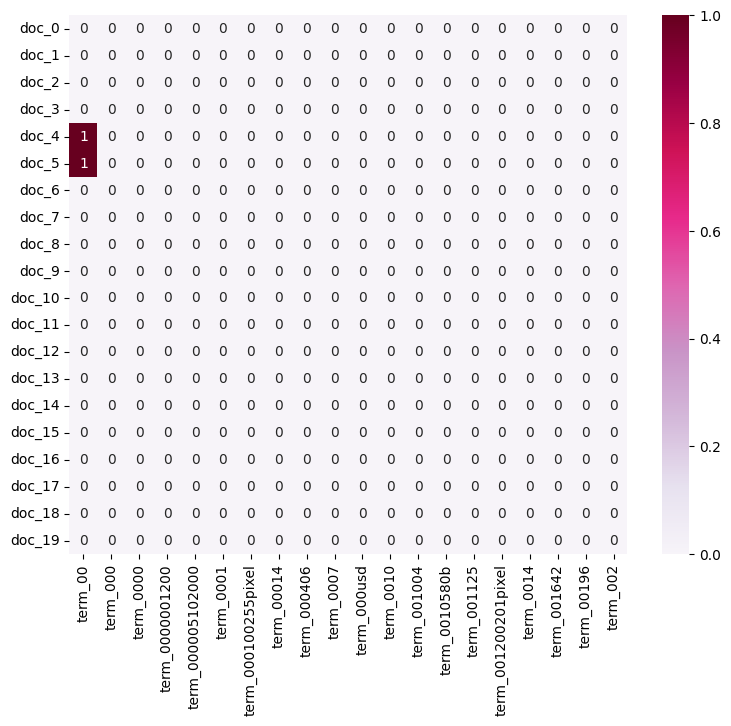

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt


df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

Посмотрите более красивые цветовые палитры здесь: https://python-graph-gallery.com/197-available-color-palettes-with-matplotlib/

---

### **>>> Упражнение 11:**

Из приведенной выше диаграммы мы видим, насколько разрежена матрица слово-документ; т. е. в подвыборке матрицы есть только одно слово с частотой `1`. Кстати, вы, возможно, заметили, что мы выбрали только 20 статей и 20 слов для построения гистограммы. В качестве упражнения вы можете попробовать изменить приведенный выше код, чтобы построить график всей матрицы слово-документ или только ее выборки. Как бы вы это сделали эффективно? Помните, что в словаре много слов. Сообщите ниже, какие методы вы будете использовать, чтобы получить красивую и полезную визуализацию

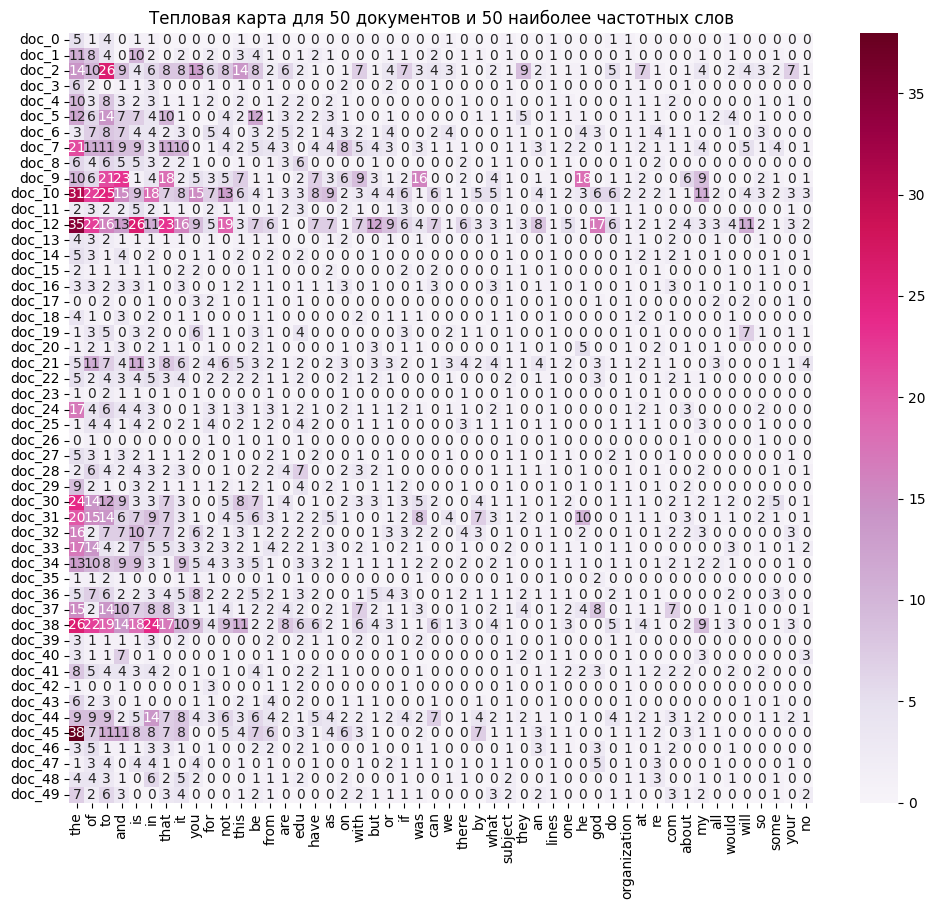

In [52]:
# Ответьте здесь
import numpy as np

# Подсчитаем суммарную частоту для каждого слова по всем документам.
word_frequencies = np.array(X_counts.sum(axis=0)).flatten()

# Выберем топ-N слов (например, 50)
N = 50
top_word_indices = word_frequencies.argsort()[::-1][:N]

top_words = count_vect.get_feature_names_out()[top_word_indices]

# Можно выбрать подмножество документов, например, первые 50 документов
selected_docs = list(X.index[:50])

# Создадим подматрицу для выбранных документов и топ-N слов
submatrix = X_counts[:50, top_word_indices].toarray()

# Построим тепловую карту

df_todraw = pd.DataFrame(submatrix, columns=top_words, index=["doc_" + str(i) for i in range(50)])
plt.figure(figsize=(12, 10))
sns.heatmap(df_todraw, cmap="PuRd", annot=True, fmt="d")
plt.title("Тепловая карта для 50 документов и 50 наиболее частотных слов")
plt.show()


---

Самое замечательное в том, что мы сделали до сих пор, это то, что мы теперь открываем двери для новых задач. Давайте будем оптимистами. Даже если у нас есть задач разреженности и очень многомерные данные, мы теперь ближе к раскрытию магии данных. Видите ли, цена, которую вы платите за тяжелую работу, того стоит, потому что теперь вы получаете много знаний из того, что было просто списком того, что казалось не относящимися к делу статьями. Просто тот факт, что вы можете исследовать данные и узнать интересные фичи набора данных всего за пару строк кода, - это то, что действительно вдохновляет заниматься наукой о данных.

---

### 5.4 Сокращение размерности
Поскольку мы только что коснулись концепции разреженности, естественно, возникает проблема «проклятия размерности». Не будем вдаваться в подробности того, что такое сокращение размерности и для чего оно полезно, для начала это отличный метод эффективной визуализации данных. Мы решим проблему разреженности с помощью нескольких строк кода. И попытаемся визуализировать наши данные более эффективно с помощью результатов.

Мы собираемся использовать анализ главных компонент для эффективного сокращения размерности наших данных с главной целью «найти проекцию, которая охватывает наибольшее количество вариаций в данных». Эта концепция важна, поскольку она очень полезна для визуализации и наблюдения за характеристиками нашего набора данных.

[Алгоритм PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

**Входные данные:** Необработанная матрица слов-векторов

**Выходные данные:** Проекции

In [45]:
from sklearn.decomposition import PCA

In [46]:
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())

In [47]:
X_reduced.shape

(2257, 2)

In [48]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

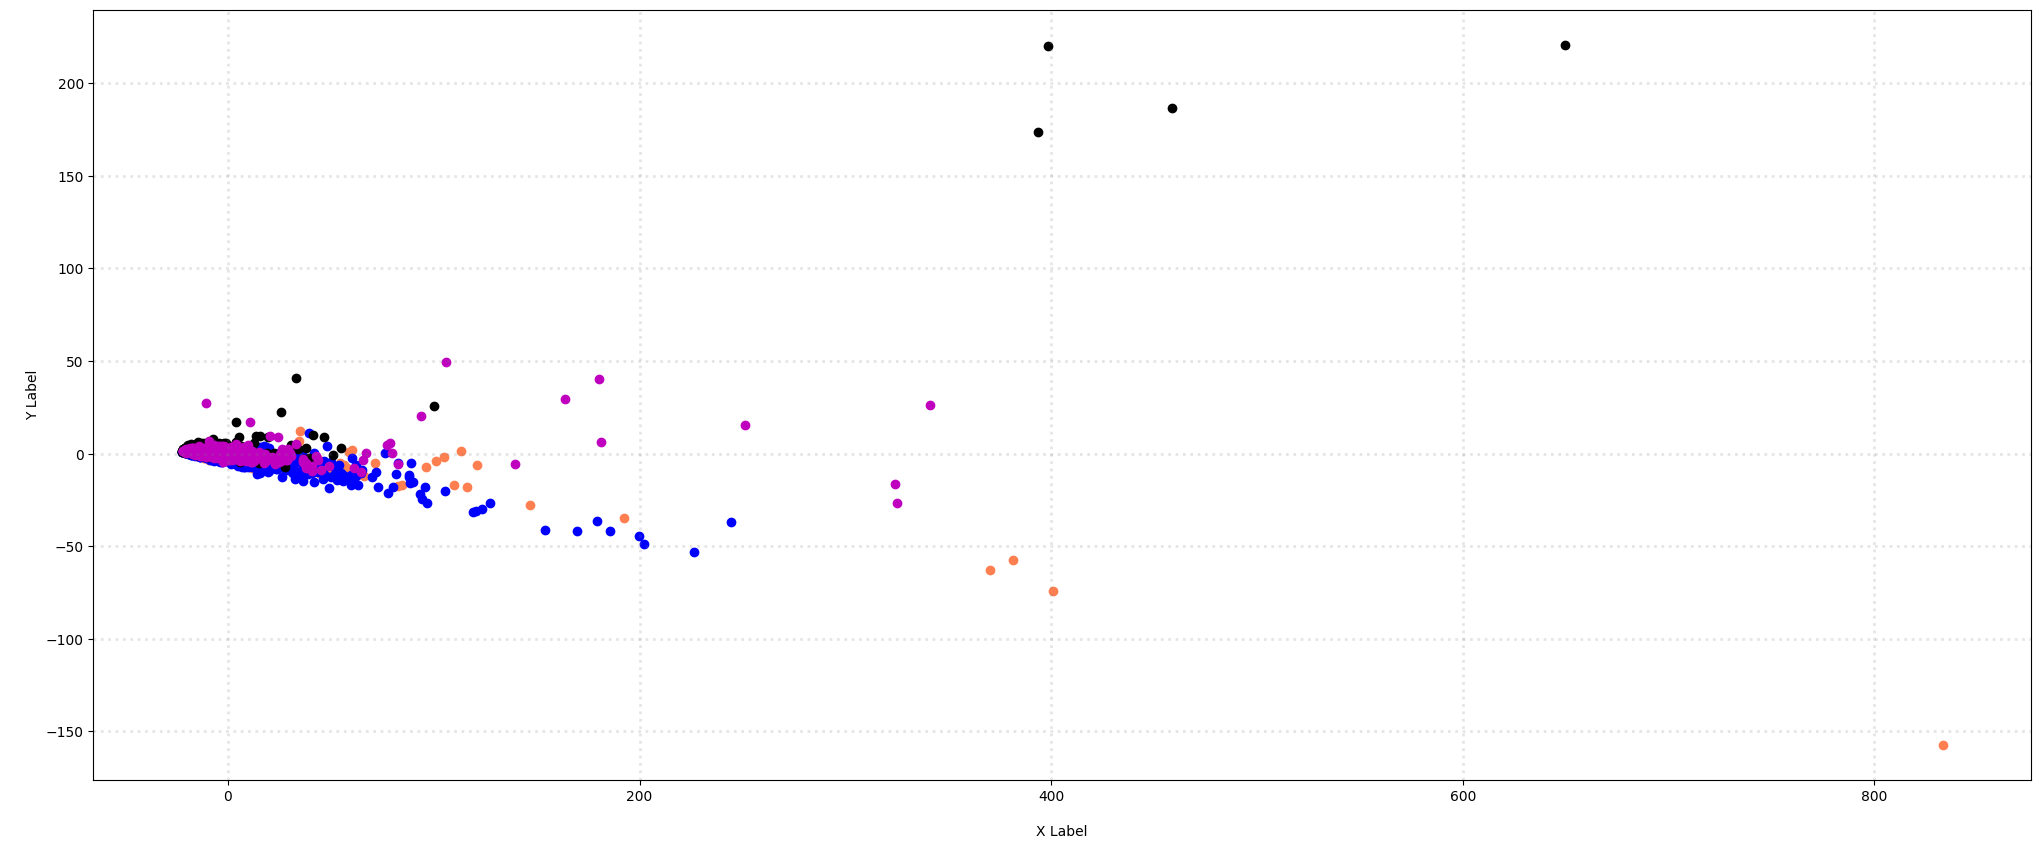

In [49]:
col = ['coral', 'blue', 'black', 'm']

# график
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

Из приведенной выше 2D-визуализации мы можем увидеть небольшой «намек на разделение в данных»; т. е. у них может быть некоторая специальная группировка по категориям, но это не сразу ясно. PCA применялся к необработанным частотам, и это считается очень наивным подходом, поскольку некоторые слова не являются действительно уникальными для документа. Только категоризация по частоте слов считается подходом «мешка слов». Позже на курсе вы узнаете о различных подходах к созданию более качественных признаков из матрицы терм-векторов, таких как обратная частота документов, так называемая TF-IDF.

---

### >>> Упражнение 12:

Пожалуйста, попробуйте уменьшить размерность до 3 и построить график результатов, используя трехмерный график. Используйте не менее 3 различных углов (положение камеры), чтобы проверить свой результат и описать, что вы обнаружили.

$Подсказка$: вы можете обратиться к Axes3D в документации.

Форма 3D преобразованной матрицы: (2257, 3)


Text(0.5, 0.92, '3D PCA визуализация (изменяем перспективу)')

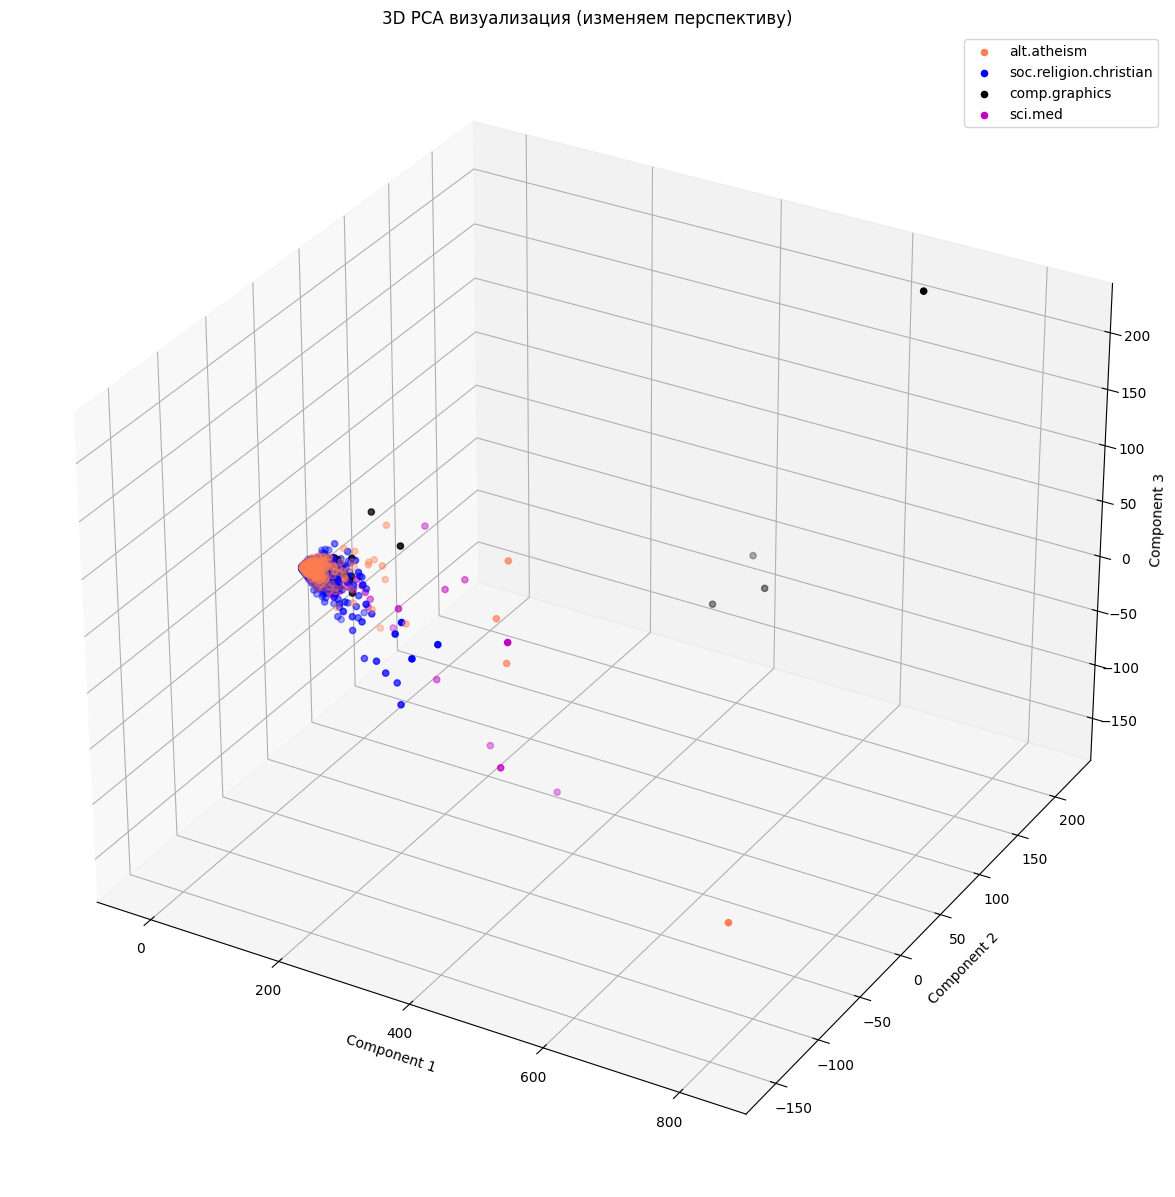

In [66]:
# Ответьте здесь
# Преобразуем матрицу X_counts в 3D (n_samples x 3)
X_reduced_3d = PCA(n_components=3).fit_transform(X_counts.toarray())
print("Форма 3D преобразованной матрицы:", X_reduced_3d.shape)

# Предположим, что переменная categories уже определена и содержит значения для каждого документа.

col = ['coral', 'blue', 'black', 'm']


# Создаем фигуру и ось 3D
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Для каждого набора документов (по категориям) выделяем данные и строим scatter plot.
for c, category in zip(col, categories):
    # Находим индексы документов, соответствующих данной категории.
    mask = X['category_name'] == category
    xs = X_reduced_3d[mask, 0]
    ys = X_reduced_3d[mask, 1]
    zs = X_reduced_3d[mask, 2]
    ax.scatter(xs, ys, zs, c=c, marker='o', label=category)

# Оформляем график
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.legend()
plt.title("3D PCA визуализация (изменяем перспективу)")


### 5.5 Преобразование / Агрегация атрибутов
Помимо применения метода уменьшения размерности для решения проблемы разреженности, с матрицей терм-векторов можно делать и другие вещи. Здесь мы собираемся сгенерировать простое распределение слов, найденных во всем наборе статей. Интуитивно это может не иметь никакого смысла, но в науке о данных иногда мы принимаем некоторые вещи как должное, и мы просто должны сначала изучить данные, прежде чем делать какие-либо преждевременные выводы. Что касается преобразования атрибутов, мы возьмем распределение слов и поместим распределение в шкалу, которая облегчает анализ закономерностей в распределении слов. Давайте приступим!

Во-первых, нам нужно вычислить эти частоты для каждого слова во всех документах. С визуальной точки зрения, мы стремимся добавить значения 2D-матрицы по вертикали; т. е. сумма каждого столбца. Вы также можете назвать этот процесс агрегированием, который мы не будем изучать далее в этой записной книжке из-за типа данных, с которыми мы имеем дело. Но я думаю, вы поняли, что это включает в себя.

![alt txt](https://docs.google.com/drawings/d/e/2PACX-1vTMfs0zWsbeAl-wrpvyCcZqeEUf7ggoGkDubrxX5XtwC5iysHFukD6c-dtyybuHnYigiRWRlRk2S7gp/pub?w=750&h=412)

In [50]:
# обратите внимание, что это требует времени для вычисления. Возможно, вы захотите уменьшить количество слов, для которых хотите вычислить частоты
term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

In [51]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [53]:
term_frequencies[0]

134

<ipython-input-54-9cb5cf1287d9>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


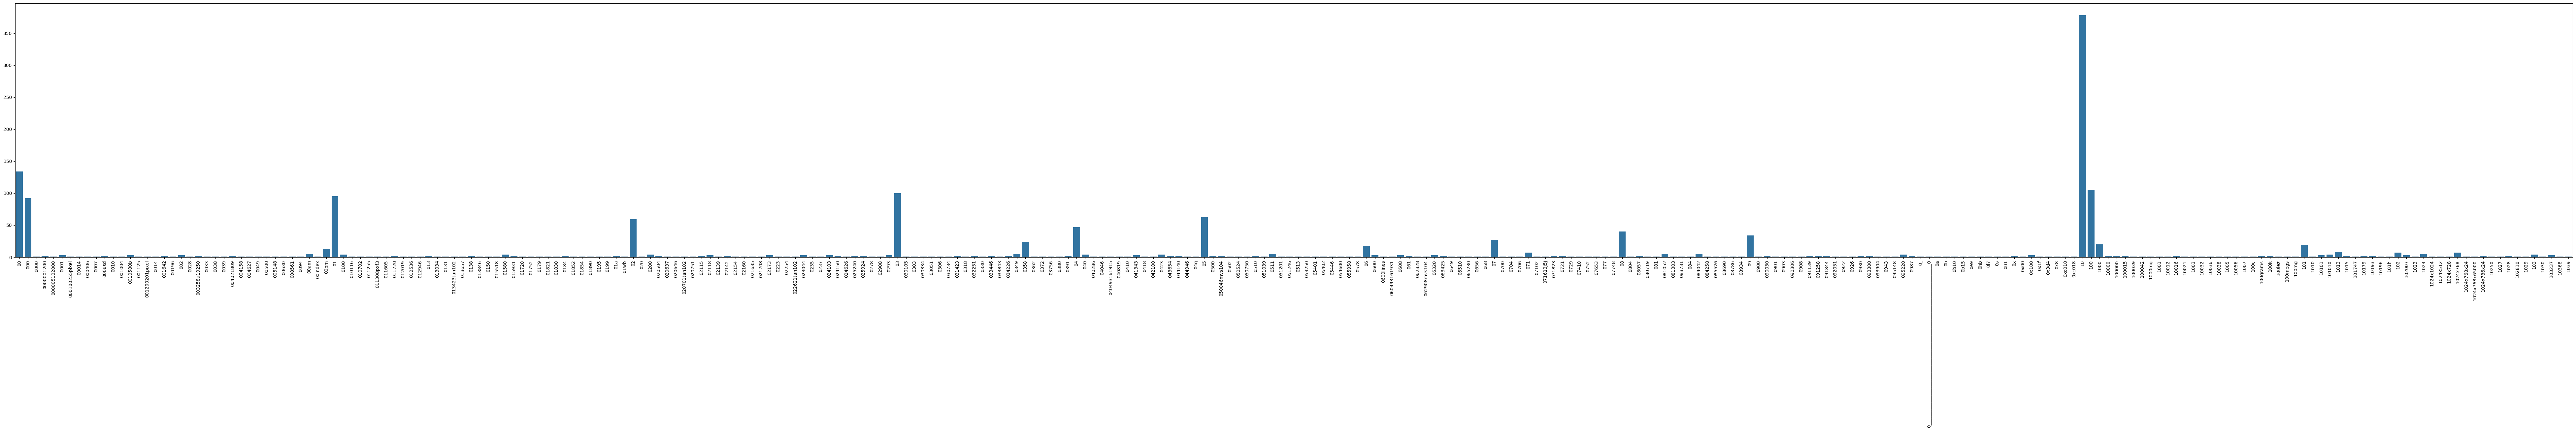

In [54]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Упражнение 13:**
Диаграмма выше содержит весь словарь, и вычислительно сложно как вычислять, так и визуализировать. Эффективно уменьшите количество словов, которые хотите визуализировать,

<ipython-input-68-44971bf84432>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_words, y=top_frequencies, palette="viridis")


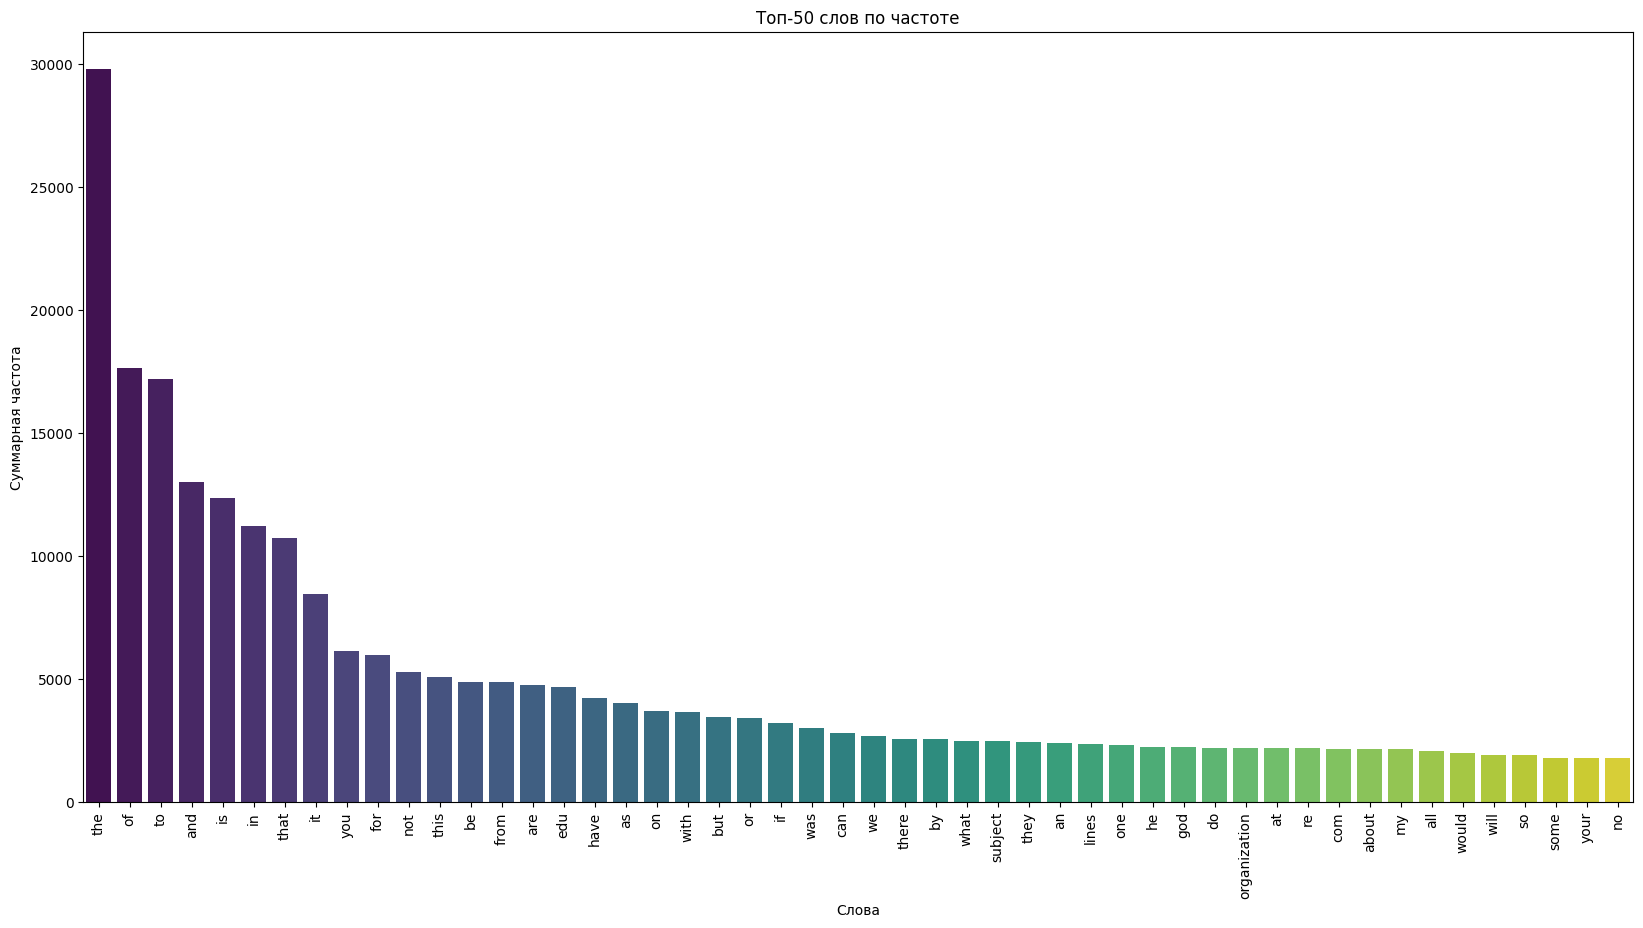

In [68]:
# Answer here
# Ответьте здесь
# Суммарная частота каждого слова (по всем документам)
# Приводим к одномерному массиву
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Получаем имена всех признаков (слов)
words = count_vect.get_feature_names_out()

# Находим индексы сортировки по убыванию их частоты
sorted_indices = np.argsort(term_frequencies)[::-1]

# Выбираем топ-N слов
top_N = 50
top_indices = sorted_indices[:top_N]

# Создаем подмассивы для слов и их частот
top_words = words[top_indices]
top_frequencies = term_frequencies[top_indices]

# Визуализируем с помощью barplot
plt.figure(figsize=(20, 10))
sns.barplot(x=top_words, y=top_frequencies, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Слова")
plt.ylabel("Суммарная частота")
plt.title(f"Топ-{top_N} слов по частоте")
plt.show()

---

### >>> **Упражнение 14:**
Отсортируйте слова на оси x по частоте, а не в алфавитном порядке. Таким образом, визуализация будет более значимой, и вы сможете наблюдать так называемый [длинный хвост](https://en.wikipedia.org/wiki/Long_tail) (ознакомьтесь с этим словом, так как он будет часто появляться в интеллектуальном анализе данных и других курсах статистики). См. рисунок ниже

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

<ipython-input-103-bcc94896c26e>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=np.arange(len(top_words)), y=top_frequencies, palette="viridis")


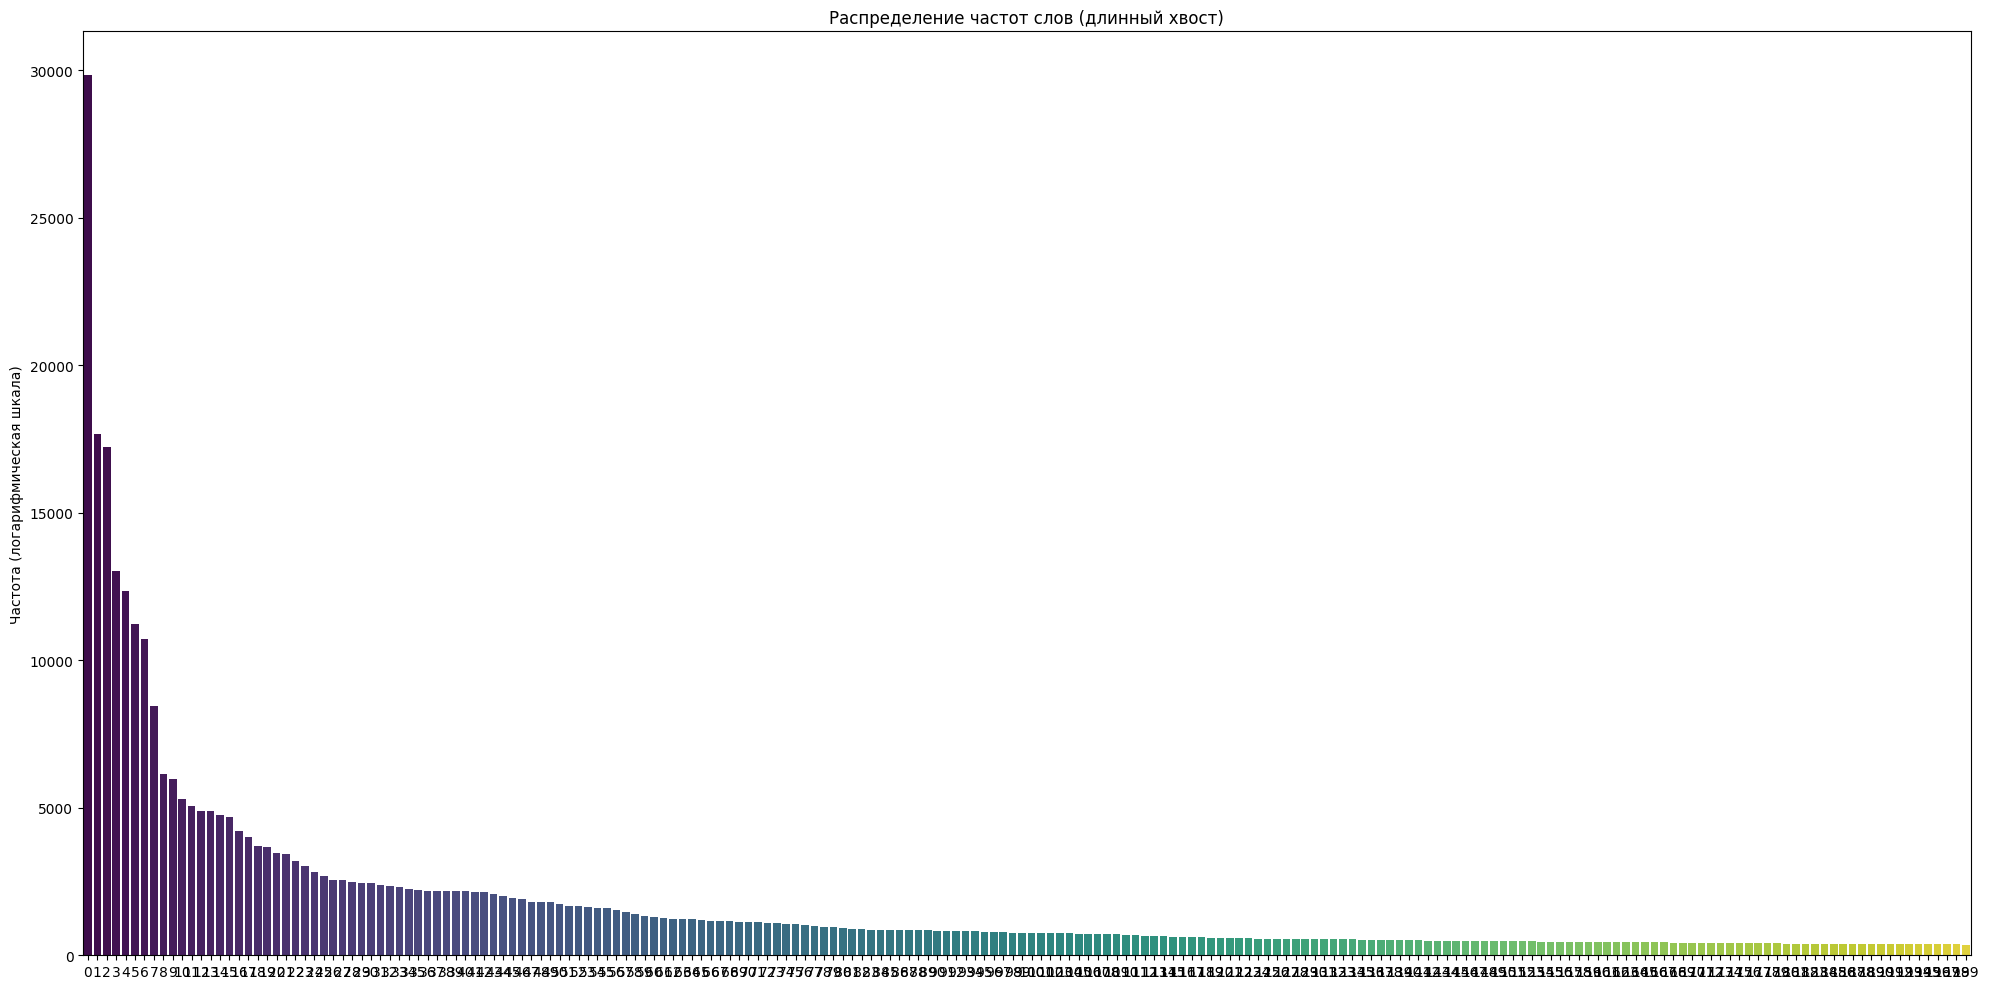

In [103]:
# Ответьте здесь
# Используйте больше слов, чтобы показать длинный хвост
top_N = 200

# Получиние отсортированных индексов для всех слов
sorted_indices = np.argsort(term_frequencies)[::-1]
top_indices = sorted_indices[:top_N]

# Создание массивов для построения графиков
top_words = words[top_indices]
top_frequencies = term_frequencies[top_indices]

# Создание визуализации
plt.figure(figsize=(20, 10))
sns.barplot(x=np.arange(len(top_words)), y=top_frequencies, palette="viridis")
plt.ylabel("Частота (логарифмическая шкала)")
plt.title(f"Распределение частот слов (длинный хвост)")

plt.tight_layout()
plt.show()

---

Поскольку у нас уже есть эти частоты слов, мы также можем преобразовать значения в этом векторе в логарифмическое распределение. Все, что нам нужно, это импортировать библиотеку `math`, предоставленную python, и применить ее к массиву значений вектора частоты слов. Это типичный пример преобразования атрибутов. Давайте сделаем это. Логарифмическое распределение - это метод визуализации частоты слов в масштабе, который позволяет легко визуализировать распределение в более удобочитаемом формате. Другими словами, различия между частотами слов теперь легко наблюдать. Давайте попробуем!

In [69]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

<ipython-input-70-95b72ce9758d>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);


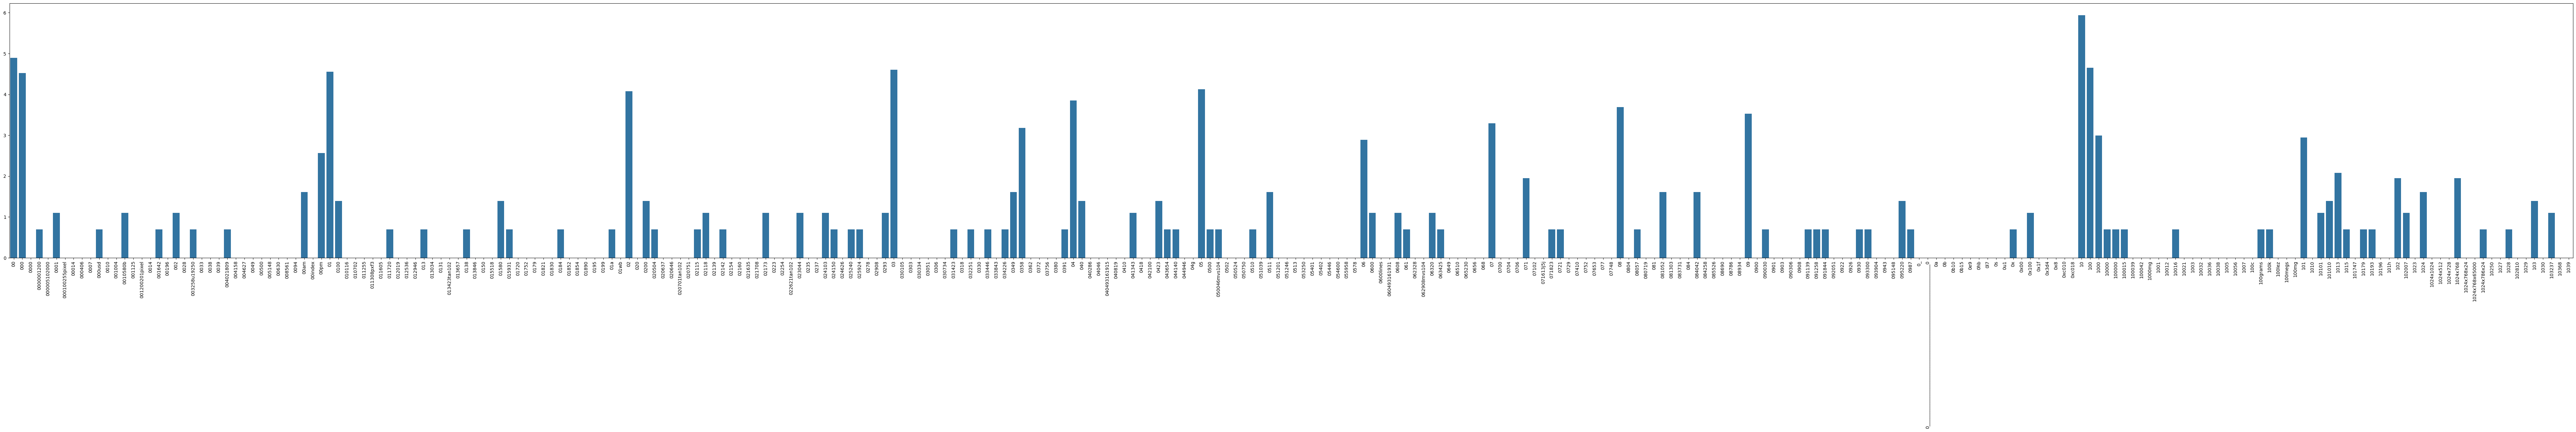

In [70]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

Помимо наблюдения полного преобразования распределения, обратите внимание на масштаб по оси y. Логарифмическое распределение в нашем неотсортированном примере не имеет смысла, но попробуйте правильно отсортировать слова по их частоте, и вы увидите интересный эффект. Сделайте это!

---

### 5.6 Дискретизация и бинаризация
В этом разделе мы собираемся обсудить очень важный метод предварительной обработки, используемый для преобразования данных, в частности категориальных значений, в формат, который соответствует определенным критериям, требуемым конкретными алгоритмами. Учитывая наш текущий исходный набор данных, мы хотели бы преобразовать один из атрибутов, `category_name`, в четыре двоичных атрибута. Другими словами, мы берем имя категории и заменяем его `n` асимметричными двоичными атрибутами. Логика этого преобразования подробно обсуждается в рекомендованном учебнике по интеллектуальному анализу данных. Люди из сообщества машинного обучения также называют это преобразование one-hot кодированием, но, как вы можете узнать позже на курсе, все эти понятия одинаковы, у нас просто разные предпочтения в том, как мы называем эти понятия. Давайте посмотрим, чего мы хотим достичь в коде.

In [57]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [58]:
mlb = preprocessing.LabelBinarizer()

In [59]:
mlb.fit(X.category)

LabelBinarizer()

In [60]:
mlb.classes_

array([0, 1, 2, 3])

In [61]:
X['bin_category'] = mlb.transform(X['category']).tolist()

In [62]:
X[0:9]

,text,category,category_name,unigrams,bin_category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...","[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[From, :, jodfishe, @, silver.ucs.indiana.edu,...","[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[From, :, aldridge, @, netcom.com, (, Jacqueli...","[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...","[0, 0, 1, 0]"


Взгляните на новый атрибут, который мы добавили в таблицу `X`. Вы можете видеть, что новый атрибут, который называется `bin_category`, содержит массив из 0 и 1. `1` в основном указывает позицию метки или категории, которую мы бинаризовали. Если вы посмотрите на первые две записи, единица помещается в слот 2 в массиве; это помогает указать любому из алгоритмов, в которые мы передаем эти данные, что запись принадлежит к этой конкретной категории.

Атрибуты с **непрерывными значениями** также имеют стратегии преобразования данных; это обычно называется **Дискретизацией**.

---

### >>> **Упражнение 15:**
Попробуйте сгенерировать бинаризацию, используя столбец `category_name`. Это работает?

In [73]:
# Answer here
# Ответьте здесь
# Используем LabelBinarizer для столбца category_name
mlb_category = preprocessing.LabelBinarizer()
# Обратите внимание: если категорий более двух, то transform вернет матрицу (n_samples, n_classes)
binary_category = mlb_category.fit_transform(X['category_name'])

# Выведем классы
print("Классы:", mlb_category.classes_)

# Добавляем бинаризированные данные в DataFrame.
# Если классов несколько, то можно сохранить их в отдельных столбцах.
if binary_category.ndim == 2 and binary_category.shape[1] > 1:
    for idx, cls in enumerate(mlb_category.classes_):
        X[f'bin_cat_{cls}'] = binary_category[:, idx]
else:
    X['bin_category_name'] = binary_category

# Вывод первых нескольких строк для проверки
print(X.head(10))

Классы: ['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']
                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, a

---

## 6. Заключительные замечания

Мы прошли долгий путь! Теперь можно называть себя экспертами по предварительной обработке данных. Вы должны чувствовать себя взволнованными и гордыми, потому что процесс интеллектуального анализа данных обычно включает в себя 70% предварительной обработки и 30% моделей обучения обучению. Вы узнаете об этом по мере продвижения по курсу Data Mining. Я действительно считаю, что, если вы выполните упражнения и бросите себе вызов, вы на пути к тому, чтобы стать супер-специалистом по данным.

Отсюда ваши возможности безграничны. Теперь вы знаете, как использовать почти все распространенные методы предварительной обработки с помощью современных инструментов, таких как Pandas и Scikit-learn. Теперь вы в тренде!

После завершения этой записной книжки вы можете многое сделать с полученными результатами. Вы можете обучать алгоритмы и модели, которые могут классифицировать статьи по определенным категориям и многое другое. Вы также можете попытаться поэкспериментировать с различными наборами данных или углубиться в текстовую аналитику, используя новые методы глубокого обучения, такие как word2vec. Все это будет представлено на следующем лабораторном занятии. А пока идите и научите машины быть умными, чтобы сделать мир лучше.